# Importing important packages 

In [1]:
## Importing important stuff
import random
import numpy as np
import pandas as pd
from PIL import Image 
import tifffile as tiff

             ###############
#plotting
import matplotlib.pyplot as plt
from plotly.offline import iplot
import plotly.graph_objs as go
            ####################
#machine learning stuff
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.utils.np_utils import to_categorical   
###
from keras import models
from keras import layers
###
import pickle as pkl
import time

Using TensorFlow backend.


# Loading data

In [3]:
#loading the images 
X_crop = np.load('x_true_test_128.npy')
y_crop = np.load('y_true_test_128.npy')

In [4]:
x=X_crop
y=y_crop

In [5]:
len(x)

1250

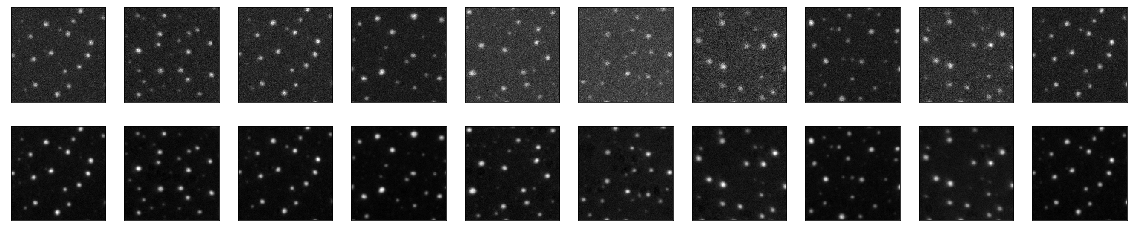

In [6]:
#checking correspondance 
#####check for correspondance
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x[i].reshape(128, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
        # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(y[i].reshape(128, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [7]:
#normalizing 
print(x.max())
print(x.min())
print(y.max())
print(y.min())
# Normalizing works like this: 
# 

354
88
5516
411


In [8]:
len(y)

1250

In [9]:
#normalization
x = (x - 76)/(53731.0 - 76)
y = (y - 76)/(53731.0 - 76)
print(x)

[[[0.00067095 0.00057777 0.00083869 ... 0.00067095 0.00076414 0.00082005]
  [0.00070823 0.00057777 0.00070823 ... 0.00085733 0.00063368 0.00057777]
  [0.00067095 0.00082005 0.00080142 ... 0.00063368 0.00065232 0.00068959]
  ...
  [0.00078278 0.00072687 0.00072687 ... 0.00055913 0.00070823 0.00055913]
  [0.00050321 0.00076414 0.0005964  ... 0.00063368 0.00080142 0.00072687]
  [0.00057777 0.00080142 0.00072687 ... 0.00068959 0.00065232 0.00078278]]

 [[0.00072687 0.00065232 0.00080142 ... 0.00130463 0.00080142 0.00070823]
  [0.00078278 0.00068959 0.00082005 ... 0.00109962 0.00111826 0.00082005]
  [0.00061504 0.0005964  0.00070823 ... 0.00102507 0.00080142 0.00057777]
  ...
  [0.00070823 0.00070823 0.0008946  ... 0.00054049 0.0007455  0.00078278]
  [0.00085733 0.00080142 0.00072687 ... 0.00061504 0.00082005 0.00095052]
  [0.00078278 0.00087597 0.00076414 ... 0.00083869 0.00087597 0.00068959]]

 [[0.00095052 0.00072687 0.00078278 ... 0.00083869 0.00063368 0.00068959]
  [0.00067095 0.000670

In [10]:
#Splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
#printing shapes 
print('shape of x_train is ', x_train.shape)
print('shape of y_train is ', y_train.shape)
print('shape of x_test is ', x_test.shape)
print('shape of y_test is ', y_test.shape)

shape of x_train is  (1000, 128, 128)
shape of y_train is  (1000, 128, 128)
shape of x_test is  (250, 128, 128)
shape of y_test is  (250, 128, 128)


In [12]:
#reshaping for the fitting
x_train = x_train.reshape(x_train.shape[0], 128,128,1)
x_test = x_test.reshape(x_test.shape[0], 128,128,1)
y_train = y_train.reshape(y_train.shape[0], 128,128,1)
y_test = y_test.reshape(y_test.shape[0], 128,128,1)


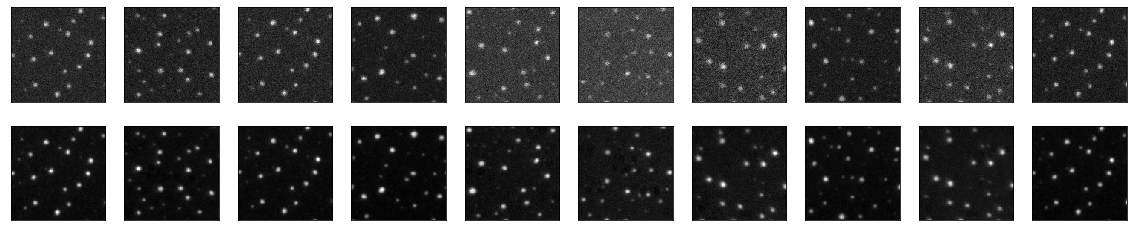

In [13]:
#####check for correspondance
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x[i].reshape(128, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
        # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(y[i].reshape(128, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

# Creating Network

In [15]:
import keras
from keras.models import load_model
from keras.datasets import cifar10
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose, concatenate
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
from keras import backend as K

import os
import pickle
import numpy as np
#import cv2

In [17]:
inputs = Input((128, 128, 1)) # 256
conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs) 
conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) # 128 
conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) # 64 
conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)  # 32 
conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)   #16
conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)
pool5 = MaxPooling2D(pool_size=(2, 2))(conv5)   #4
conv6 = Conv2D(1024, (3, 3), activation='relu', padding='same')(pool5)
conv6 = Conv2D(1024, (3, 3), activation='relu', padding='same')(conv6)
pool6 = MaxPooling2D(pool_size=(2, 2))(conv6)  #2
conv7 = Conv2D(2048, (3, 3), activation='relu', padding='same')(pool6)
conv7 = Conv2D(2048, (3, 3), activation='relu', padding='same')(conv7)
#pool7 = MaxPooling2D(pool_size=(2, 2))(conv7)   #1
#conv8 = Conv2D(4096, (3, 3), activation='relu', padding='same')(pool7)
#conv8 = Conv2D(4096, (3, 3), activation='relu', padding='same')(conv8)


In [19]:
up8 = concatenate([Conv2DTranspose(1024, (2, 2), strides=(2, 2), padding='same')(conv7), conv6], axis=3) #4
conv8 = Conv2D(1024, (3, 3), activation='relu', padding='same')(up8)
conv8 = Conv2D(1024, (3, 3), activation='relu', padding='same')(conv8)
#
up9 = concatenate([Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(conv8), conv5], axis=3) #8
conv9 = Conv2D(512, (3, 3), activation='relu', padding='same')(up9)
conv9 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv9)
#
up10 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv9), conv4], axis=3) #16
conv10 = Conv2D(256, (3, 3), activation='relu', padding='same')(up10)
conv10 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv10)
#
up11 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv10), conv3], axis=3) #32
conv11 = Conv2D(128, (3, 3), activation='relu', padding='same')(up11)
conv11 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv11)
#
up12 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv11), conv2], axis=3) #64
conv12 = Conv2D(64, (3, 3), activation='relu', padding='same')(up12)
conv12 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv12)
#
up13 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv12), conv1], axis=3) #128
conv13 = Conv2D(32, (3, 3), activation='relu', padding='same')(up13)
conv13 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv13)
#
#up15 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv14), conv1], axis=3) #256
#conv15 = Conv2D(32, (3, 3), activation='relu', padding='same')(up15)
#conv15 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv15)

#removed the activatio = 'sigmoid from the last layer'
conv14 = Conv2D(1, (3, 3), padding='same')(conv13)

In [20]:
model = Model(inputs=[inputs], outputs=[conv14])
model.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['mse'])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 128, 128, 1)  0                                            
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 128, 128, 32) 320         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 128, 128, 32) 9248        conv2d_15[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_7 (MaxPooling2D)  (None, 64, 64, 32)   0           conv2d_16[0][0]                  
__________________________________________________________________________________________________
conv2d_17 

In [21]:
#decreasing data
x_train= x_train[:12000]
y_train=y_train[:12000]
x_test = x_test[:3000]
y_test=y_test[:3000]

# Fitting

In [22]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

model.save_weights('model_128_init_short.h5')
callbacks = [EarlyStopping(monitor='val_mean_squared_error', patience=10),
             ModelCheckpoint(filepath='UNET_128_short.h5', monitor='val_mean_squared_error', save_best_only=True)]


In [23]:
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(250, 128, 128, 1)
(250, 128, 128, 1)
(1000, 128, 128, 1)
(1000, 128, 128, 1)


In [ ]:
#####
#Here I try monitoring the mse and minimizing that 
start=time.time()

model.load_weights('model_128_init_short.h5')
history = model.fit(x_train,y_train,
                              epochs=10,
                              batch_size=128,
                              verbose=1, # set to 0 for no printout while running
                              callbacks=callbacks, # Early stopping
                              validation_data=(x_test,y_test))
loss_values = model.estimator.loss_curve_
plt.plot(loss_values)
plt.show()
end=time.time()

print('fitting took ', (end-start)/60, 'minutes to run')

Instructions for updating:
Use tf.cast instead.
Train on 1000 samples, validate on 250 samples
Epoch 1/10
1000/1000 [==============================] - 1531s 2s/step - loss: 0.0703 - mean_squared_error: 3.6756e-05 - val_loss: 0.0634 - val_mean_squared_error: 1.8534e-05
Epoch 2/10
1000/1000 [==============================] - 55015s 55s/step - loss: 0.0636 - mean_squared_error: 1.9147e-05 - val_loss: 0.0634 - val_mean_squared_error: 1.8397e-05
Epoch 3/10
1000/1000 [==============================] - 1119s 1s/step - loss: 0.0636 - mean_squared_error: 1.9011e-05 - val_loss: 0.0634 - val_mean_squared_error: 1.8298e-05
Epoch 4/10
1000/1000 [==============================] - 1119s 1s/step - loss: 0.0636 - mean_squared_error: 1.8934e-05 - val_loss: 0.0634 - val_mean_squared_error: 1.8214e-05
Epoch 5/10
1000/1000 [==============================] - 14405s 14s/step - loss: 0.0635 - mean_squared_error: 1.8885e-05 - val_loss: 0.0634 - val_mean_squared_error: 1.8197e-05
Epoch 6/10
 384/1000 [=========

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# Get training and test loss histories
training_loss = history.history['mean_squared_error']
test_loss = history.history['val_mean_squared_error']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

fig = plt.figure()
# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training MSE', 'Test MSE'])
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show();

fig.savefig('unet_mse.png')

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

fig = plt.figure()
# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

fig.savefig('unet_loss.png')

In [ ]:
import pickle
with open("patience_mse_train_re_28.txt", "wb") as f:   #Pickling
    pickle.dump(history.history['mean_squared_error'], f)
with open("patience_mse_test_re_28.txt", "wb") as f:   #Pickling
    pickle.dump(history.history['val_mean_squared_error'], f)
with open("patience_loss_train_re_28.txt", "wb") as f:   #Pickling
    pickle.dump(history.history['loss'], f)
with open("patience_loss_test_re_28.txt", "wb") as f:   #Pickling
    pickle.dump(history.history['val_loss'], f)

In [ ]:
#loading the model 
model = load_model('UNET_128_short.h5')

In [ ]:
pred = model.predict(x_test[:30])

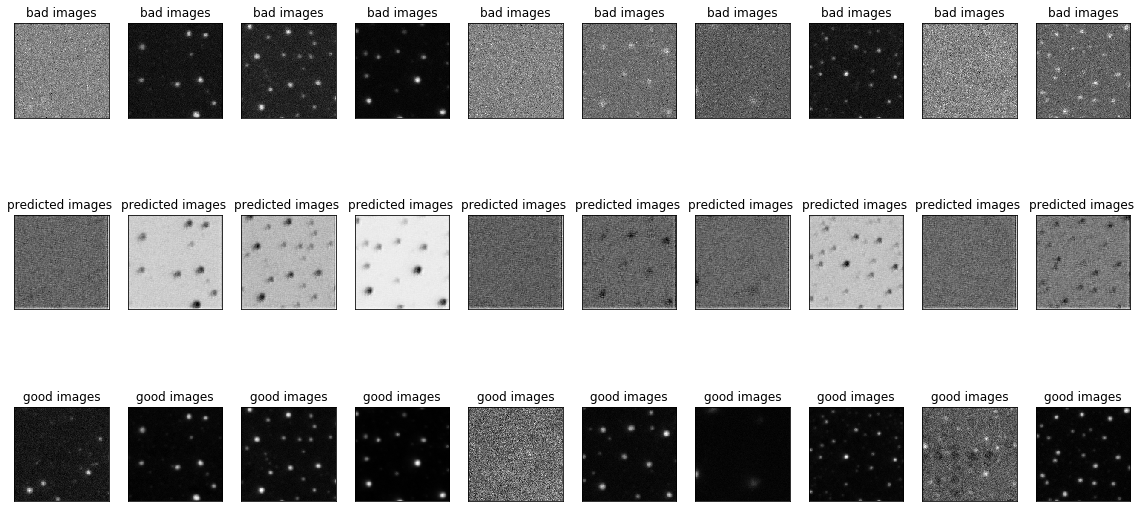

In [33]:
#checking correspondance 
#####check for correspondance
import matplotlib.pyplot as plt

ax1 = []
ax2 = []
ax3 = []

n = 10  # how many digits we will display
plt.figure(figsize=(20, 10))
for i in range(n):
    # display original
    ax1 = plt.subplot(3, n, i + 1)
    ax1.title.set_text('bad images')
    
    plt.imshow(x_test[i+n].reshape(128, 128))
    plt.gray()
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)
    
        # display reconstruction
    ax2 = plt.subplot(3, n, i + 1 + n)
    ax2.title.set_text('predicted images ')
    plt.imshow(pred[i+n].reshape(128, 128))
    plt.gray()
    ax2.get_xaxis().set_visible(False)
    ax2.get_yaxis().set_visible(False)
            # display reconstruction
    ax3 = plt.subplot(3, n, i + 1 + n+n)
    ax3.title.set_text('good images')
    plt.imshow(y_test[i+n].reshape(128, 128))
    plt.gray()
    ax3.get_xaxis().set_visible(False)
    ax3.get_yaxis().set_visible(False)

plt.show()

In [34]:
##  very good

#load other testing data
x_TT = np.load('x_true_test_128.npy')
y_TT = np.load('y_true_test_128.npy')

# reshape them 
x_TT = x_TT.reshape(x_TT.shape[0],128,128,1)
y_TT = y_TT.reshape(y_TT.shape[0],128,128,1)
#predict the other testing data. 
#
#

In [35]:
x_TT_sc = x_TT/53731.0
y_TT_sc = y_TT/53731.0

In [36]:
new_pre_sc= model.predict(x_TT_sc[:20])

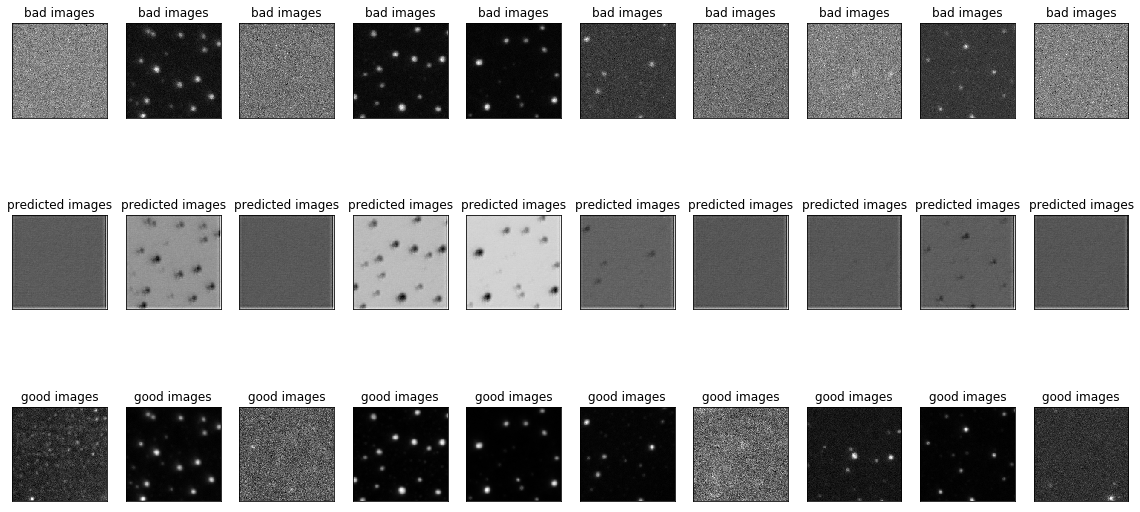

In [37]:
#checking correspondance 
#####check for correspondance
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 10))
for i in range(n):
    # display original
    ax1 = plt.subplot(3, n, i + 1)
    ax1.title.set_text('bad images')
    plt.imshow(x_TT_sc[i].reshape(128, 128))
    plt.gray()
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)
    
        # display reconstruction
    ax2 = plt.subplot(3, n, i + 1 + n)
    ax2.title.set_text('predicted images')
    plt.imshow(new_pre_sc[i].reshape(128, 128))
    plt.gray()
    ax2.get_xaxis().set_visible(False)
    ax2.get_yaxis().set_visible(False)
            # display reconstruction
    ax3 = plt.subplot(3, n, i + 1 + n + n)
    ax3.title.set_text('good images')
    plt.imshow(y_TT_sc[i].reshape(128, 128))
    plt.gray()
    ax3.get_xaxis().set_visible(False)
    ax3.get_yaxis().set_visible(False)

plt.show()

In [ ]:
#saving files are TIFF files for analysis